# Phase-Locking Value (PLV)

Compute phase-locking value between two phase time series.
PLV quantifies the consistency of the phase relationship between
two signals: 1.0 means perfectly locked, 0.0 means no coupling.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gastropy as gp

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

## Basic PLV: Locked vs. Random Phases

In [2]:
rng = np.random.default_rng(42)
n = 300
t = np.arange(n)

# Two phase series with a constant offset -> perfect coupling
phase_a = np.angle(np.exp(1j * 2 * np.pi * 0.05 * t))
phase_b = phase_a + 0.5  # constant lag
print(f"Locked PLV:  {gp.phase_locking_value(phase_a, phase_b)}")

# Two independent random phase series -> near-zero coupling
rand_a = rng.uniform(-np.pi, np.pi, n)
rand_b = rng.uniform(-np.pi, np.pi, n)
print(f"Random PLV:  {gp.phase_locking_value(rand_a, rand_b):.4f}")

Locked PLV:  1.0
Random PLV:  0.0746


## Vectorized PLV across Multiple Signals

When `phase_a` is 2D (timepoints x signals), PLV is computed
for each signal against the shared reference `phase_b`. This
is how voxelwise coupling maps are computed.

In [3]:
# 5 "voxels" locked to the reference with different offsets + noise
offsets = [0.1, 0.3, 0.5, 0.7, 0.9]
bold_phases = np.column_stack([phase_a + off for off in offsets])
bold_phases += 0.3 * rng.standard_normal(bold_phases.shape)

plv_vec = gp.phase_locking_value(bold_phases, phase_a)
print(f"PLV per voxel: {plv_vec.round(4)}")

PLV per voxel: [0.9564 0.9528 0.9572 0.9558 0.9516]


## Complex PLV: Magnitude and Preferred Phase Lag

`phase_locking_value_complex` returns the complex mean of
the phase difference. Its magnitude is the PLV; its angle
gives the preferred phase lag between the two signals.

In [4]:
cplv = gp.phase_locking_value_complex(bold_phases, phase_a)
print(f"Magnitude (= PLV): {np.abs(cplv).round(4)}")
print(f"Preferred lag (deg): {np.rad2deg(np.angle(cplv)).round(1)}")

Magnitude (= PLV): [0.9564 0.9528 0.9572 0.9558 0.9516]
Preferred lag (deg): [ 5.3 16.1 26.2 39.  50.9]


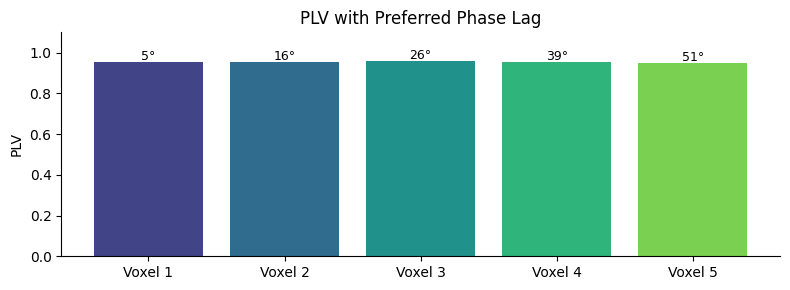

In [5]:
fig, ax = plt.subplots(figsize=(8, 3))
lags = np.rad2deg(np.angle(cplv))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(offsets)))
bars = ax.bar(range(len(offsets)), np.abs(cplv), color=colors)
for bar, lag in zip(bars, lags, strict=True):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{lag:.0f}\u00b0", ha="center", fontsize=9)
ax.set_xticks(range(len(offsets)))
ax.set_xticklabels([f"Voxel {i + 1}" for i in range(len(offsets))])
ax.set_ylabel("PLV")
ax.set_ylim(0, 1.1)
ax.set_title("PLV with Preferred Phase Lag")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.tight_layout()
plt.show()

**See also:** [Surrogate Testing](surrogate_testing.ipynb),
[Circular Statistics](circular_statistics.ipynb),
[Coupling Tutorial](../tutorials/gastric_brain_coupling.ipynb)